In this collab document, I have  2 large datasets *(movies.csv)* *(netflix-rotten-tomatoes-metacritic-imdb)* that includes:

Movie title, Rating, Genre, Year, IMDB score, Rotten Tomatoes score, Metacritic score, Director, Country, Budget, Gross, Production Company, runtime etc.
  
as the columns for more than **8.000 + 16.000** different movies


***Hypothesis tests and conlcusions are placed below and above the graphs.***

# **Exploratory Data Analysis of Score Distributions: IMDb, Rotten Tomatoes, and Metacritic**


--- Score Distribution Analysis ---

IMDb Score Statistics:
Mean: 6.50, Median: 6.60, Std: 1.15, Min: 1.0, Max: 9.7

Rotten Tomatoes Score Statistics:
Mean: 59.52, Median: 64.00, Std: 27.00, Min: 0.0, Max: 100.0

Metacritic Score Statistics:
Mean: 56.81, Median: 57.00, Std: 17.58, Min: 5.0, Max: 100.0

Interpretation:
IMDb scores are typically on a 1-10 scale, while Rotten Tomatoes and Metacritic use a 0-100 scale.
This difference should be considered when comparing averages directly.
You can see from the printed statistics whether one rating system is generally more generous or more strict than the others.



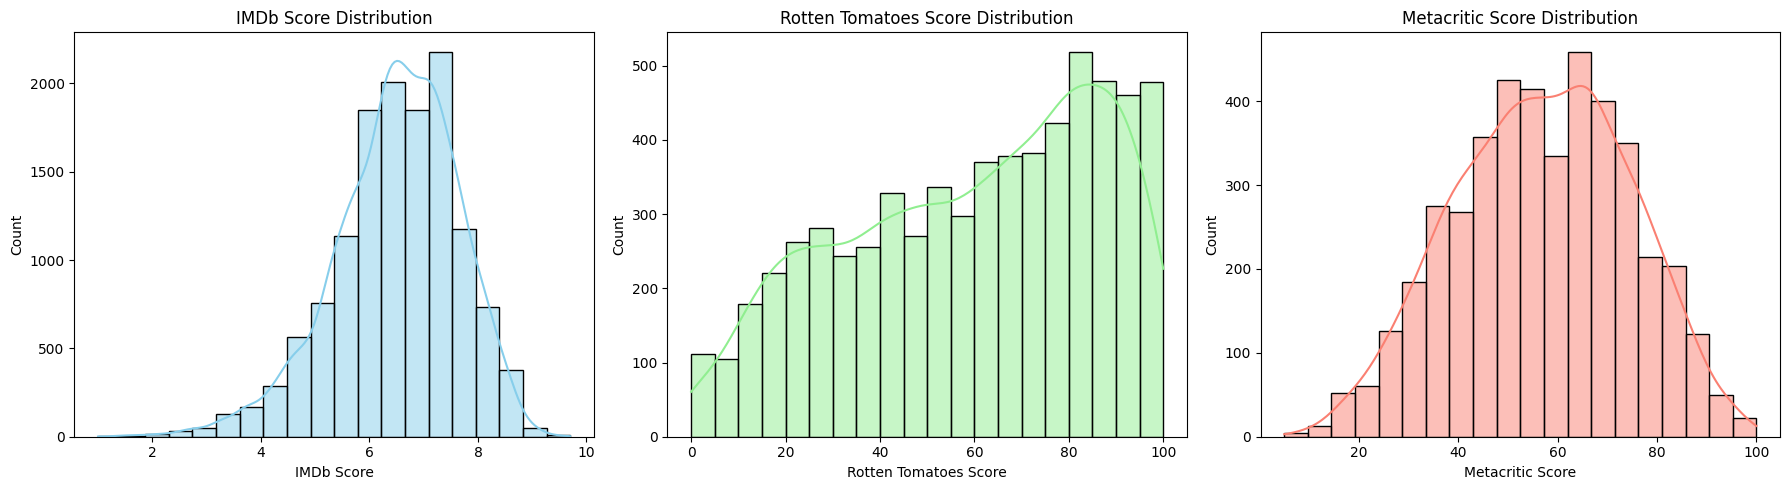

--- Explanation ---
The above histograms and statistics show the overall distribution and spread of each rating system.
If you want to compare them directly, consider scaling IMDb scores by multiplying them by 10.
Large differences in means or standard deviations suggest that some rating systems are systematically harsher or more lenient.
If you notice skewness, it could indicate that the rating system has a bias (for example, more films getting high or low scores).


In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("/content/netflix-rotten-tomatoes-metacritic-imdb.csv")



print("\n--- Score Distribution Analysis ---")


imdb = df['IMDb Score'].dropna()
rotten = df['Rotten Tomatoes Score'].dropna()
meta = df['Metacritic Score'].dropna()

print("\nIMDb Score Statistics:")
print(f"Mean: {imdb.mean():.2f}, Median: {imdb.median():.2f}, Std: {imdb.std():.2f}, Min: {imdb.min()}, Max: {imdb.max()}")

print("\nRotten Tomatoes Score Statistics:")
print(f"Mean: {rotten.mean():.2f}, Median: {rotten.median():.2f}, Std: {rotten.std():.2f}, Min: {rotten.min()}, Max: {rotten.max()}")

print("\nMetacritic Score Statistics:")
print(f"Mean: {meta.mean():.2f}, Median: {meta.median():.2f}, Std: {meta.std():.2f}, Min: {meta.min()}, Max: {meta.max()}")

print("\nInterpretation:")
print("IMDb scores are typically on a 1-10 scale, while Rotten Tomatoes and Metacritic use a 0-100 scale.")
print("This difference should be considered when comparing averages directly.")
print("You can see from the printed statistics whether one rating system is generally more generous or more strict than the others.\n")

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(imdb, kde=True, bins=20, color="skyblue")
plt.title("IMDb Score Distribution")

plt.subplot(1, 3, 2)
sns.histplot(rotten, kde=True, bins=20, color="lightgreen")
plt.title("Rotten Tomatoes Score Distribution")


plt.subplot(1, 3, 3)
sns.histplot(meta, kde=True, bins=20, color="salmon")
plt.title("Metacritic Score Distribution")

plt.tight_layout()
plt.show()

print("--- Explanation ---")
print("The above histograms and statistics show the overall distribution and spread of each rating system.")
print("If you want to compare them directly, consider scaling IMDb scores by multiplying them by 10.")
print("Large differences in means or standard deviations suggest that some rating systems are systematically harsher or more lenient.")
print("If you notice skewness, it could indicate that the rating system has a bias (for example, more films getting high or low scores).")


# **Exploratory Data Analysis for the effect of director on IMDB rating.**


=== ANOVA Test Summary: IMDb & Rotten Tomatoes (by Director) ===

IMDb dataset:
  F-statistic: 0.0444
  p-value:     0.85255804
  → Decision:  FAIL TO REJECT H₀: No significant difference.

Rotten Tomatoes dataset:
  F-statistic: 4.1020
  p-value:     0.00000000
  → Decision:  REJECT H₀: There IS a significant difference.

(See visualizations below for Top/Bottom 5 directors by average score.)



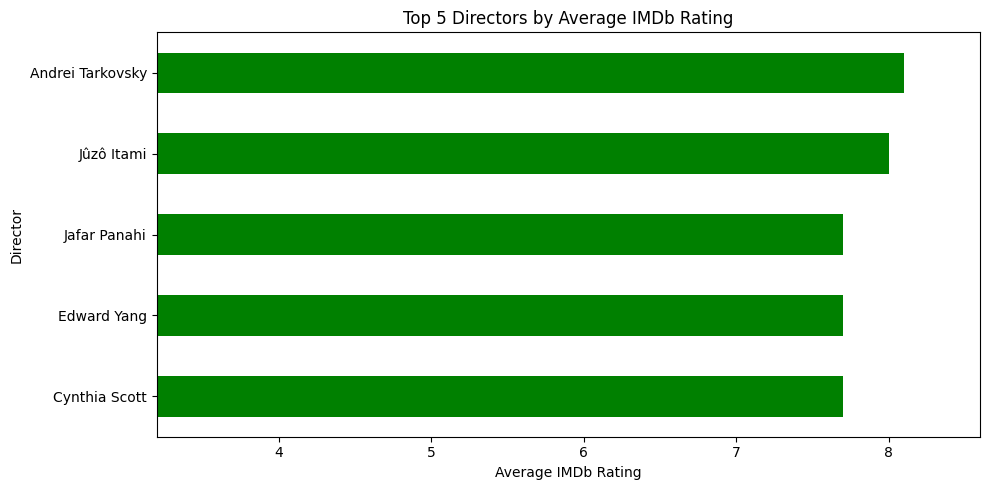

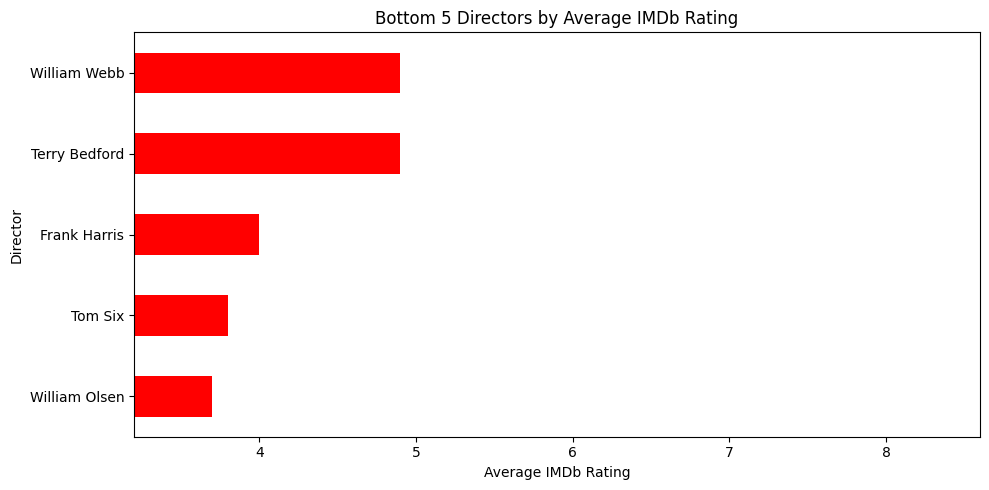

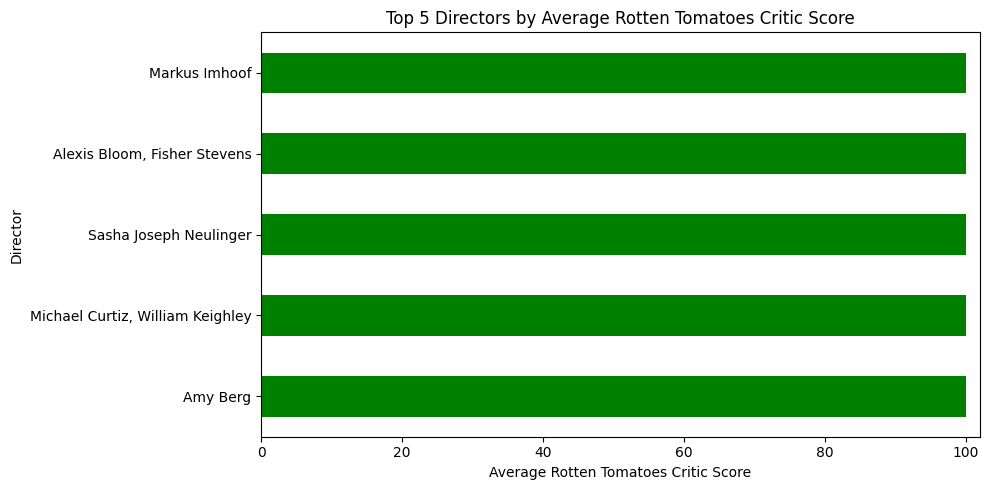

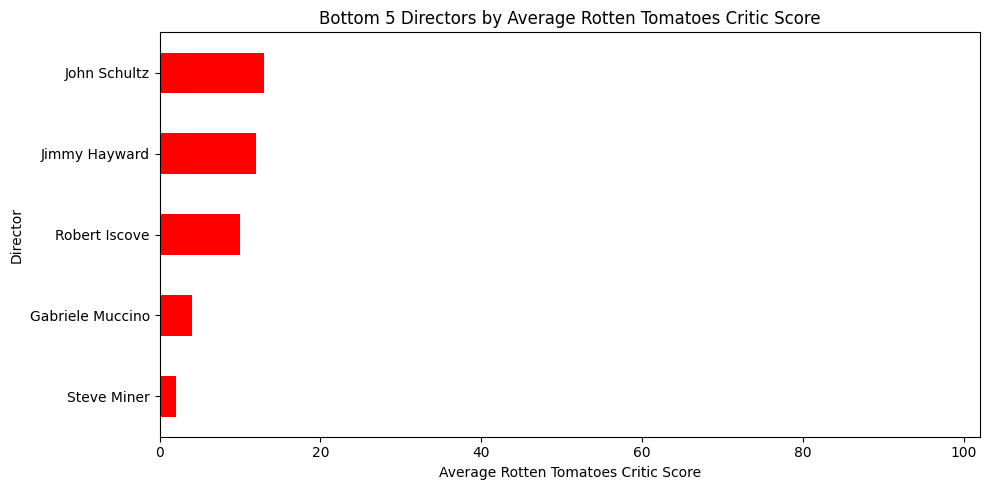

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

file_path_imdb = "/content/movies.csv"
df_imdb = pd.read_csv(file_path_imdb, on_bad_lines='skip', encoding='utf-8')
df_director_score = df_imdb[['director', 'score']].dropna()
df_director_score['score'] = pd.to_numeric(df_director_score['score'], errors='coerce')
df_director_score = df_director_score.dropna()
director_avg_scores = df_director_score.groupby('director')['score'].mean().reset_index()
director_avg_scores.columns = ['director', 'avg_score']
top5_directors = director_avg_scores.sort_values(by='avg_score', ascending=False).head(5).set_index('director')
bottom5_directors = director_avg_scores.sort_values(by='avg_score', ascending=True).head(5).set_index('director')
grouped_directors = df_director_score.groupby('director')
valid_groups = [group['score'].values for _, group in grouped_directors if len(group) >= 2]
anova_result = f_oneway(*valid_groups)
f_stat = anova_result.statistic
p_val = anova_result.pvalue
alpha = 0.05
imdb_hypothesis = "REJECT H₀: There IS a significant difference." if p_val < alpha else "FAIL TO REJECT H₀: No significant difference."

file_path_rt = "/content/rotten_tomatoes_top_movies.csv"
df_rt = pd.read_csv(file_path_rt, on_bad_lines='skip', encoding='utf-8')
df_rt_dir = df_rt[['director', 'critic_score']].dropna()
df_rt_dir['critic_score'] = pd.to_numeric(df_rt_dir['critic_score'], errors='coerce')
df_rt_dir = df_rt_dir.dropna()
director_avg_scores_rt = df_rt_dir.groupby('director')['critic_score'].mean().reset_index()
director_avg_scores_rt.columns = ['director', 'avg_score']
top5_directors_rt = director_avg_scores_rt.sort_values(by='avg_score', ascending=False).head(5).set_index('director')
bottom5_directors_rt = director_avg_scores_rt.sort_values(by='avg_score', ascending=True).head(5).set_index('director')
grouped_directors_rt = df_rt_dir.groupby('director')
valid_groups_rt = [group['critic_score'].values for _, group in grouped_directors_rt if len(group) >= 2]
anova_result_rt = f_oneway(*valid_groups_rt)
f_stat_rt = anova_result_rt.statistic
p_val_rt = anova_result_rt.pvalue
rt_hypothesis = "REJECT H₀: There IS a significant difference." if p_val_rt < alpha else "FAIL TO REJECT H₀: No significant difference."

print("\n=== ANOVA Test Summary: IMDb & Rotten Tomatoes (by Director) ===\n")
print("IMDb dataset:")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  p-value:     {p_val:.8f}")
print(f"  → Decision:  {imdb_hypothesis}\n")
print("Rotten Tomatoes dataset:")
print(f"  F-statistic: {f_stat_rt:.4f}")
print(f"  p-value:     {p_val_rt:.8f}")
print(f"  → Decision:  {rt_hypothesis}")
print("\n(See visualizations below for Top/Bottom 5 directors by average score.)\n")

x_min = min(bottom5_directors['avg_score'].min(), top5_directors['avg_score'].min()) - 0.5
x_max = max(bottom5_directors['avg_score'].max(), top5_directors['avg_score'].max()) + 0.5
plt.figure(figsize=(10, 5))
top5_directors['avg_score'].sort_values().plot(kind='barh', color='green')
plt.xlim(x_min, x_max)
plt.title('Top 5 Directors by Average IMDb Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
bottom5_directors['avg_score'].sort_values().plot(kind='barh', color='red')
plt.xlim(x_min, x_max)
plt.title('Bottom 5 Directors by Average IMDb Rating')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Director')
plt.tight_layout()
plt.show()

x_min_rt = min(bottom5_directors_rt['avg_score'].min(), top5_directors_rt['avg_score'].min()) - 2
x_max_rt = max(bottom5_directors_rt['avg_score'].max(), top5_directors_rt['avg_score'].max()) + 2
plt.figure(figsize=(10, 5))
top5_directors_rt['avg_score'].sort_values().plot(kind='barh', color='green')
plt.xlim(x_min_rt, x_max_rt)
plt.title('Top 5 Directors by Average Rotten Tomatoes Critic Score')
plt.xlabel('Average Rotten Tomatoes Critic Score')
plt.ylabel('Director')
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 5))
bottom5_directors_rt['avg_score'].sort_values().plot(kind='barh', color='red')
plt.xlim(x_min_rt, x_max_rt)
plt.title('Bottom 5 Directors by Average Rotten Tomatoes Critic Score')
plt.xlabel('Average Rotten Tomatoes Critic Score')
plt.ylabel('Director')
plt.tight_layout()
plt.show()


# **Exploratory Data Analysis for the effect of genre on IMDB, Rotten Tomatoes and Metacritic rating.**

This script analyzes and visualizes the relationship between genre and film scores on Netflix.
- It focuses on the five most common single genres (not genre combinations).
- For each genre, it compares the average IMDb, Rotten Tomatoes, and Metacritic scores.
The goal is to visually compare which genres tend to receive higher or lower ratings across three different scoring systems.

The top 5 most common single genres in this dataset are (from most to least frequent, top to bottom in the plots):
['Horror', 'Animation', 'Documentary', 'Drama', 'Comedy']


How to interpret these plots:
- Each horizontal bar shows the average score for a single genre, using IMDb, Rotten Tomatoes, and Metacritic data respectively.
- The consistent genre order across all three plots allows for direct visual comparison between scoring systems.
- If a genre consistently appears higher in all three plots, it suggests that genre tends to receive better ratings across platforms.
- Color gradients are only for vi

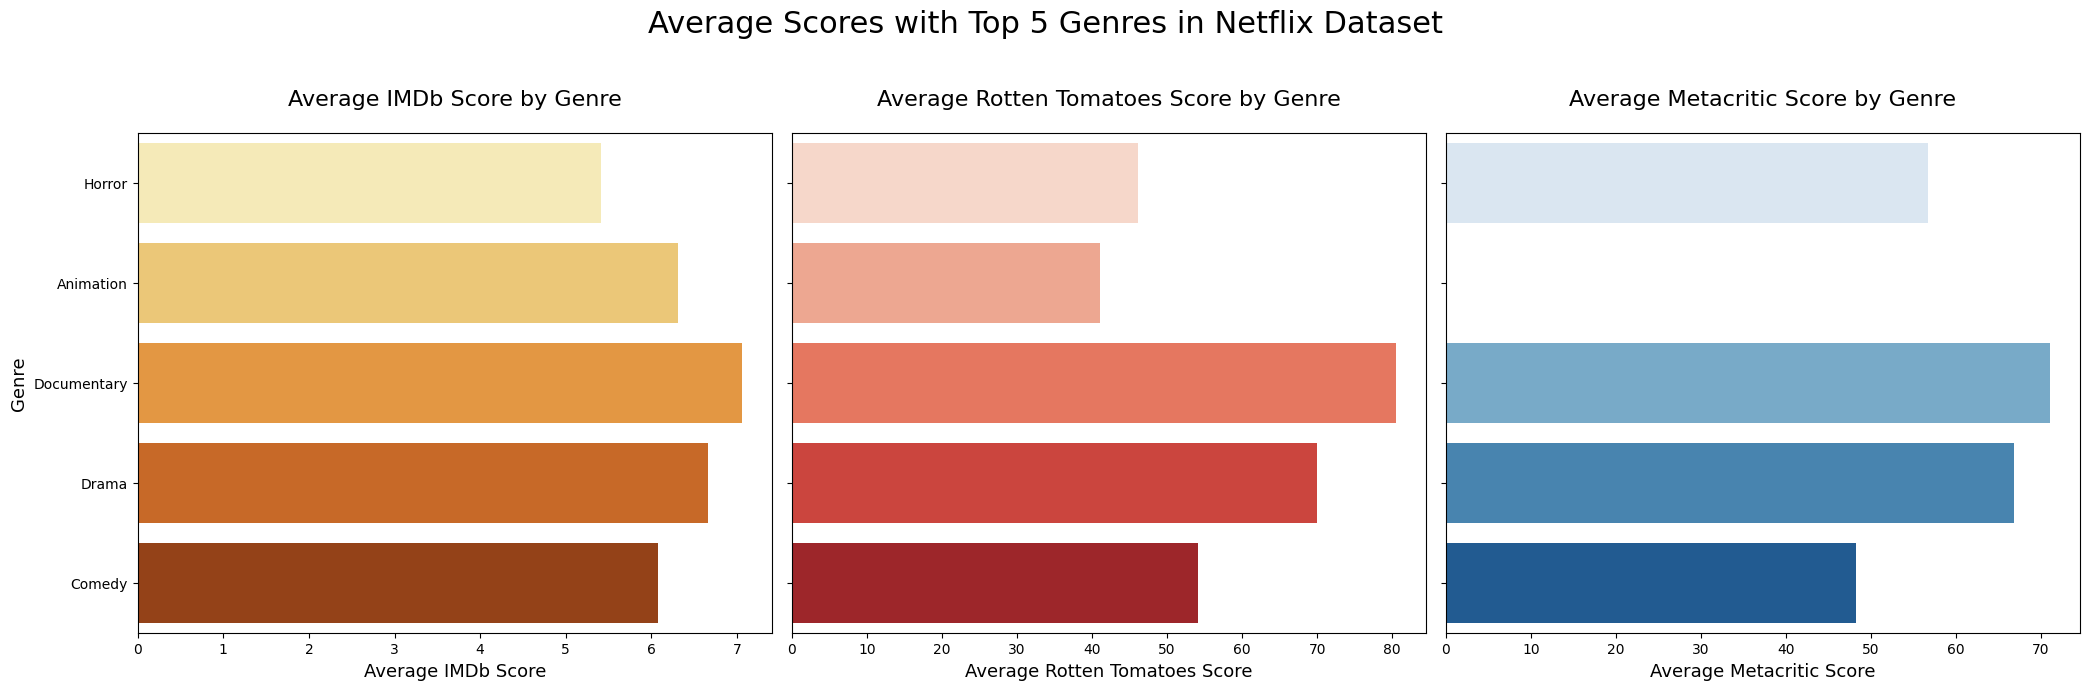

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(
    "This script analyzes and visualizes the relationship between genre and film scores on Netflix.\n"
    "- It focuses on the five most common single genres (not genre combinations).\n"
    "- For each genre, it compares the average IMDb, Rotten Tomatoes, and Metacritic scores.\n"
    "The goal is to visually compare which genres tend to receive higher or lower ratings across three different scoring systems."
)

df = pd.read_csv("/content/netflix-rotten-tomatoes-metacritic-imdb.csv")

all_genres = df['Genre'].value_counts()
main_genres = []
for genre in all_genres.index:
    if ',' not in genre and len(main_genres) < 5:
        main_genres.append(genre)
    if len(main_genres) == 5:
        break

genre_order = main_genres[::-1]

score_columns = [
    ('IMDb Score', 'IMDb Score', 'Average IMDb Score by Genre', 'YlOrBr'),
    ('Rotten Tomatoes Score', 'Rotten Tomatoes Score', 'Average Rotten Tomatoes Score by Genre', 'Reds'),
    ('Metacritic Score', 'Metacritic Score', 'Average Metacritic Score by Genre', 'Blues')
]

print(
    f"\nThe top 5 most common single genres in this dataset are (from most to least frequent, top to bottom in the plots):\n{genre_order}\n"
)
print(
    "\nHow to interpret these plots:\n"
    "- Each horizontal bar shows the average score for a single genre, using IMDb, Rotten Tomatoes, and Metacritic data respectively.\n"
    "- The consistent genre order across all three plots allows for direct visual comparison between scoring systems.\n"
    "- If a genre consistently appears higher in all three plots, it suggests that genre tends to receive better ratings across platforms.\n"
    "- Color gradients are only for visual distinction—focus on bar lengths and genre order for comparison."
)


fig, axs = plt.subplots(1, 3, figsize=(21, 7), sharey=True)
plt.subplots_adjust(top=0.83, wspace=0.37)

for idx, (col, label, title, pal) in enumerate(score_columns):
    df_genre = df[df['Genre'].isin(main_genres)][['Genre', col]].copy()
    df_genre['Genre'] = pd.Categorical(df_genre['Genre'], categories=genre_order, ordered=True)
    df_genre[col] = pd.to_numeric(df_genre[col], errors='coerce')
    df_genre = df_genre.dropna(subset=[col])

    genre_stats = (
        df_genre.groupby('Genre', observed=True)[col]
        .agg(appearances='count', avg_score='mean')
        .reindex(genre_order)
        .reset_index()
    )

    palette = sns.color_palette(pal, n_colors=len(main_genres))

    sns.barplot(
        data=genre_stats,
        x='avg_score', y='Genre',
        hue='Genre',
        order=genre_order,
        ax=axs[idx],
        palette=palette,
        dodge=False,
        legend=False
    )
    axs[idx].set_title(title, fontsize=16, pad=20)
    axs[idx].set_xlabel(f'Average {label}', fontsize=13)
    axs[idx].set_ylabel('Genre' if idx == 0 else '', fontsize=13)

plt.suptitle("Average Scores with Top 5 Genres in Netflix Dataset", fontsize=22, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



# **Exploratory Data Analysis for the effect of country on IMDB and Rotten Tomates rating.**

==== IMDb SCORE BY COUNTRY (movies.csv) ====

Dataframe shape after cleaning: (57, 2)
Comparing IMDb scores by country (countries with ≥2 films)...

ANOVA F-statistic: 5.8021
p-value: 0.000797

→ Significant difference in IMDb scores across countries.



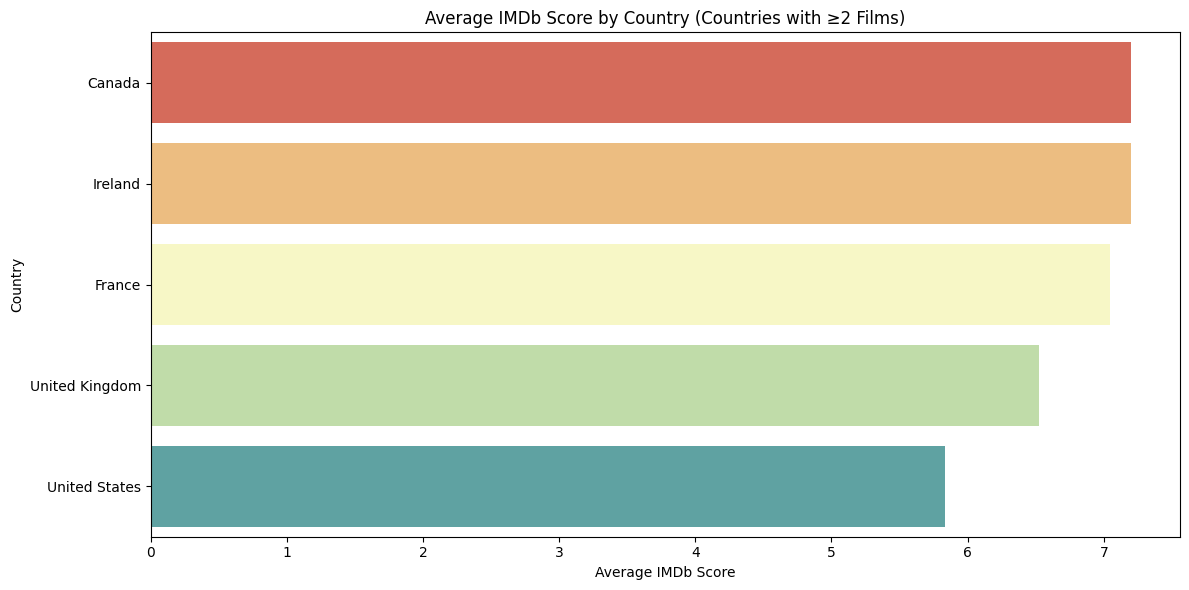

==== ROTTEN TOMATOES SCORE BY COUNTRY (netflix dataset) ====

Dataframe shape after cleaning: (6373, 2)
Comparing Rotten Tomatoes scores by main country (countries with ≥2 films)...

ANOVA F-statistic: 3.9413
p-value: 0.000000

→ Significant difference in Rotten Tomatoes scores across countries.



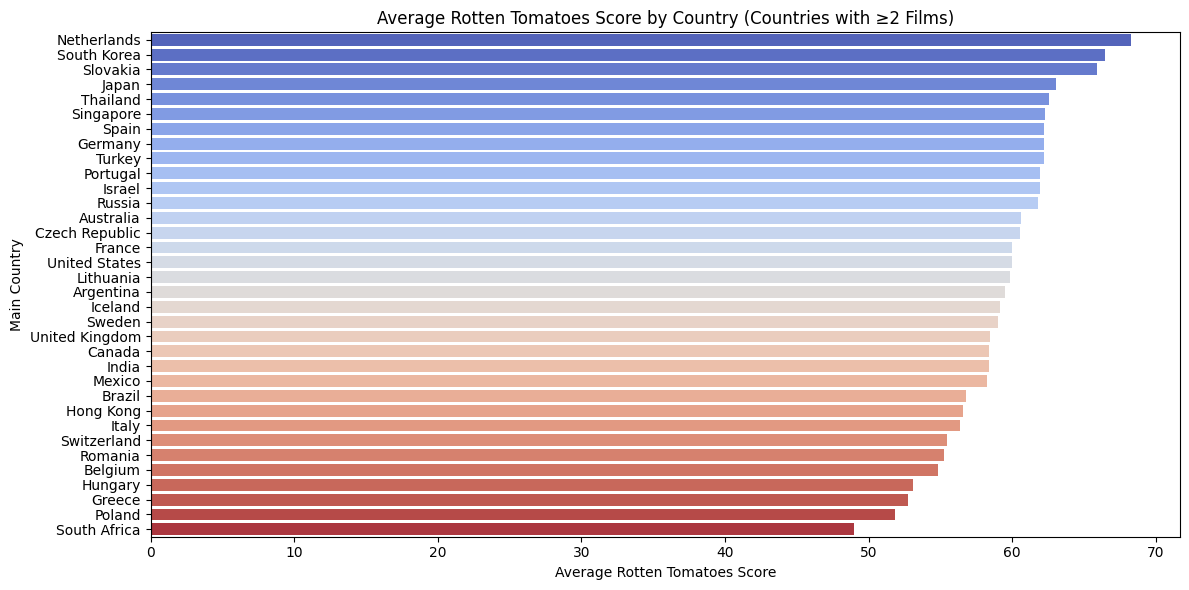

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

print("==== IMDb SCORE BY COUNTRY (movies.csv) ====\n")

with open('/content/movies.csv', 'r', encoding='utf-8') as f:
    header = f.readline().strip().split(',')
df = pd.read_csv('/content/movies.csv', skiprows=1, names=header, on_bad_lines='skip')

df_country_score = df[['country', 'score']].dropna().copy()
df_country_score['score'] = pd.to_numeric(df_country_score['score'], errors='coerce')
df_country_score = df_country_score.dropna()

print("Dataframe shape after cleaning:", df_country_score.shape)
print("Comparing IMDb scores by country (countries with ≥2 films)...\n")

grouped_all = df_country_score.groupby('country')
valid_country_groups = [group['score'].values for name, group in grouped_all if len(group) >= 2]

anova_all = f_oneway(*valid_country_groups)
f_stat_all = anova_all.statistic
p_val_all = anova_all.pvalue

print(f"ANOVA F-statistic: {f_stat_all:.4f}")
print(f"p-value: {p_val_all:.6f}\n")

if p_val_all < 0.05:
    print("→ Significant difference in IMDb scores across countries.\n")
else:
    print("→ No significant difference in IMDb scores across countries.\n")

country_avg_all = (
    df_country_score.groupby('country')['score']
    .agg(count='count', avg_score='mean')
    .reset_index()
    .sort_values(by='avg_score', ascending=False)
)

country_avg_all = country_avg_all[country_avg_all['count'] >= 2].reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=country_avg_all,
    x='avg_score',
    y='country',
    palette='Spectral',
    hue='country',
    legend=False
)
plt.xlabel('Average IMDb Score')
plt.ylabel('Country')
plt.title('Average IMDb Score by Country (Countries with ≥2 Films)')
plt.tight_layout()
plt.show()


print("==== ROTTEN TOMATOES SCORE BY COUNTRY (netflix dataset) ====\n")

df2 = pd.read_csv('/content/netflix-rotten-tomatoes-metacritic-imdb.csv')

def extract_first_country(country_string):
    if pd.isna(country_string):
        return np.nan
    return str(country_string).split(',')[0].strip()

df2['main_country'] = df2['Country Availability'].apply(extract_first_country)

df2_country_rt = df2[['main_country', 'Rotten Tomatoes Score']].dropna().copy()
df2_country_rt['Rotten Tomatoes Score'] = pd.to_numeric(df2_country_rt['Rotten Tomatoes Score'], errors='coerce')
df2_country_rt = df2_country_rt.dropna()

print("Dataframe shape after cleaning:", df2_country_rt.shape)
print("Comparing Rotten Tomatoes scores by main country (countries with ≥2 films)...\n")

grouped_rt = df2_country_rt.groupby('main_country')
valid_country_groups_rt = [group['Rotten Tomatoes Score'].values for name, group in grouped_rt if len(group) >= 2]

if len(valid_country_groups_rt) >= 2:
    anova_rt = f_oneway(*valid_country_groups_rt)
    f_stat_rt = anova_rt.statistic
    p_val_rt = anova_rt.pvalue

    print(f"ANOVA F-statistic: {f_stat_rt:.4f}")
    print(f"p-value: {p_val_rt:.6f}\n")

    if p_val_rt < 0.05:
        print("→ Significant difference in Rotten Tomatoes scores across countries.\n")
    else:
        print("→ No significant difference in Rotten Tomatoes scores across countries.\n")
else:
    print("Not enough country groups for ANOVA test in Netflix dataset.\n")

country_avg_rt = (
    df2_country_rt.groupby('main_country')['Rotten Tomatoes Score']
    .agg(count='count', avg_score='mean')
    .reset_index()
    .sort_values(by='avg_score', ascending=False)
)
country_avg_rt = country_avg_rt[country_avg_rt['count'] >= 2].reset_index(drop=True)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=country_avg_rt,
    x='avg_score',
    y='main_country',
    palette='coolwarm',
    hue='main_country',
    legend=False
)
plt.xlabel('Average Rotten Tomatoes Score')
plt.ylabel('Main Country')
plt.title('Average Rotten Tomatoes Score by Country (Countries with ≥2 Films)')
plt.tight_layout()
plt.show()


# **Exploratory Data Analysis for the effect of production company on IMDB rating.**

Step 1: Filtering data for companies with budget information (IMDb)...


Step 2: Calculating average budget per company and selecting the top 10 (IMDb)...

Step 3: Calculating average IMDb score for these companies...

Step 4: Creating a dual-axis line plot for IMDb...



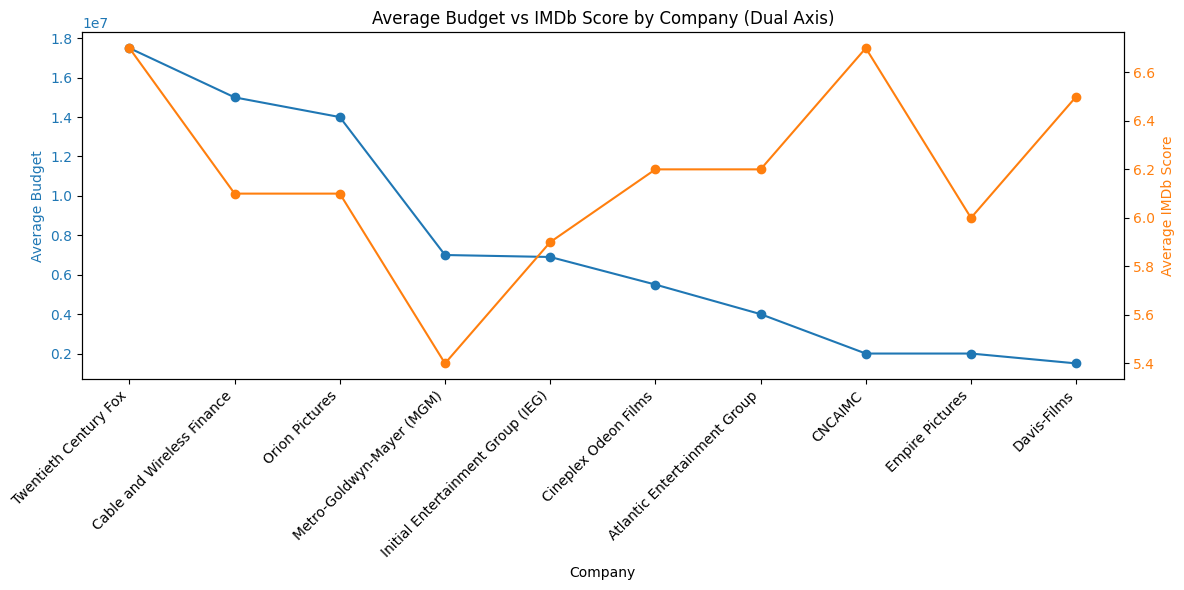


Now doing the same for Rotten Tomatoes dataset...

Creating dual-axis line plot for Rotten Tomatoes dataset...



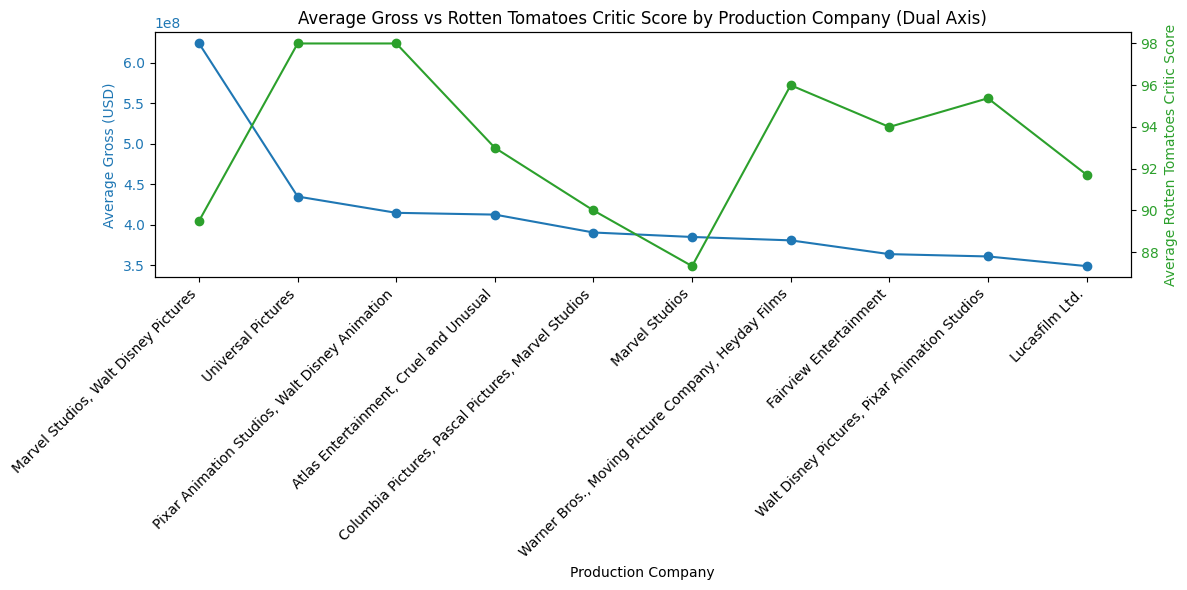

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


print("Step 1: Filtering data for companies with budget information (IMDb)...\n")
df_imdb = pd.read_csv("/content/movies.csv", on_bad_lines='skip')
df_budget = df_imdb.dropna(subset=['company', 'budget'])

print("\nStep 2: Calculating average budget per company and selecting the top 10 (IMDb)...\n")
top10_budget_companies = (
    df_budget.groupby('company')['budget']
    .mean()
    .reset_index(name='avg_budget')
    .sort_values(by='avg_budget', ascending=False)
    .head(10)
)

print("Step 3: Calculating average IMDb score for these companies...\n")
company_score = (
    df_imdb[df_imdb['company'].isin(top10_budget_companies['company'])]
    .groupby('company')['score']
    .mean()
    .reset_index(name='avg_score')
)

combined = pd.merge(top10_budget_companies, company_score, on='company')
combined_sorted = combined.sort_values(by='avg_budget', ascending=False)

print("Step 4: Creating a dual-axis line plot for IMDb...\n")
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Company')
ax1.set_ylabel('Average Budget', color=color)
ax1.plot(combined_sorted['company'], combined_sorted['avg_budget'], marker='o', color=color, label='Average Budget')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(combined_sorted['company'])))
ax1.set_xticklabels(combined_sorted['company'], rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Average IMDb Score', color=color)
ax2.plot(combined_sorted['company'], combined_sorted['avg_score'], marker='o', color=color, label='Average IMDb Score')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Budget vs IMDb Score by Company (Dual Axis)')
fig.tight_layout()
plt.show()



def parse_box_office(x):
    """Box office stringini temizle ve sayıya çevir. Destekler: 700.2M, 15K, 500000, None, '' """
    if pd.isnull(x) or x == '':
        return np.nan
    s = str(x).replace('$', '').replace(',', '').strip().upper()
    try:
        if s.endswith('M'):
            return float(s[:-1]) * 1_000_000
        elif s.endswith('K'):
            return float(s[:-1]) * 1_000
        else:
            return float(s)
    except:
        return np.nan

print("\nNow doing the same for Rotten Tomatoes dataset...\n")
df_rt = pd.read_csv("/content/rotten_tomatoes_top_movies.csv", on_bad_lines='skip')

df_rt['box_office_(gross_usa)_parsed'] = df_rt['box_office_(gross_usa)'].apply(parse_box_office)

df_rt_score = df_rt.dropna(subset=['production_co', 'box_office_(gross_usa)_parsed', 'critic_score'])

top10_rt_companies = (
    df_rt_score.groupby('production_co')['box_office_(gross_usa)_parsed']
    .mean()
    .reset_index(name='avg_budget')
    .sort_values(by='avg_budget', ascending=False)
    .head(10)
)

company_rt_score = (
    df_rt_score[df_rt_score['production_co'].isin(top10_rt_companies['production_co'])]
    .groupby('production_co')['critic_score']
    .mean()
    .reset_index(name='avg_score')
)

combined_rt = pd.merge(top10_rt_companies, company_rt_score, on='production_co')
combined_rt_sorted = combined_rt.sort_values(by='avg_budget', ascending=False)

print("Creating dual-axis line plot for Rotten Tomatoes dataset...\n")
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('Production Company')
ax1.set_ylabel('Average Gross (USD)', color=color)
ax1.plot(combined_rt_sorted['production_co'], combined_rt_sorted['avg_budget'], marker='o', color=color, label='Average Gross')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(len(combined_rt_sorted['production_co'])))
ax1.set_xticklabels(combined_rt_sorted['production_co'], rotation=45, ha='right')

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Average Rotten Tomatoes Critic Score', color=color)
ax2.plot(combined_rt_sorted['production_co'], combined_rt_sorted['avg_score'], marker='o', color=color, label='Average RT Score')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Average Gross vs Rotten Tomatoes Critic Score by Production Company (Dual Axis)')
fig.tight_layout()
plt.show()


# **Do Higher Box Office Movies Get Higher Ratings? An Analysis using IMDb, Rotten Tomatoes, and Metacritic Scores**

Number of films in each box office group:
Box Office Budget Categories
Low       1112
High      1112
Medium    1111
Name: count, dtype: int64

Box office group boundaries:
[(508.999, 10366553.667], (10366553.667, 53018560.333], (53018560.333, 659363944.0]]
Categories (3, interval[float64, right]): [(508.999, 10366553.667] < (10366553.667, 53018560.333] <
                                           (53018560.333, 659363944.0]]


=== IMDb Score ANALYSIS BY BOX OFFICE GROUP ===


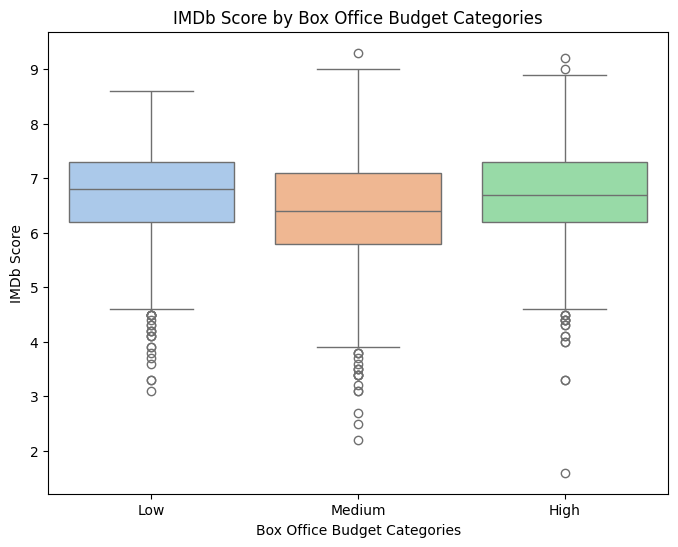


Hypothesis Test: Does the box office group affect the IMDb Score?
Null Hypothesis (H₀): The average IMDb Score is the same for all box office groups.
Alternative Hypothesis (H₁): At least one box office group has a different average IMDb Score.

ANOVA Result:
F-statistic = 38.4323
p-value = 0.0000000000

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis (H₀).
This means there is a statistically significant difference in average IMDb Score between at least some box office groups.

Average IMDb Score by Box Office Budget Categories:
Box Office Budget Categories
Low       6.672032
Medium    6.406031
High      6.726799
Name: IMDb Score, dtype: float64


=== Metacritic Score ANALYSIS BY BOX OFFICE GROUP ===


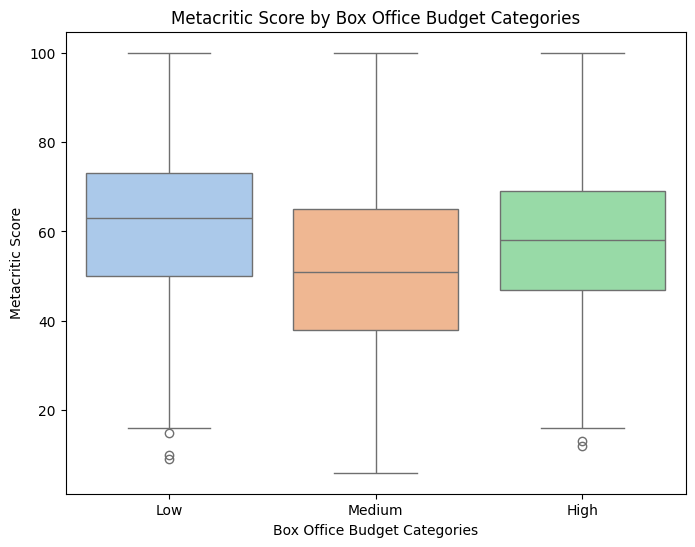


Hypothesis Test: Does the box office group affect the Metacritic Score?
Null Hypothesis (H₀): The average Metacritic Score is the same for all box office groups.
Alternative Hypothesis (H₁): At least one box office group has a different average Metacritic Score.

ANOVA Result:
F-statistic = 74.8358
p-value = 0.0000000000

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis (H₀).
This means there is a statistically significant difference in average Metacritic Score between at least some box office groups.

Average Metacritic Score by Box Office Budget Categories:
Box Office Budget Categories
Low       61.006295
Medium    52.231323
High      57.780576
Name: Metacritic Score, dtype: float64


=== Rotten Tomatoes Score ANALYSIS BY BOX OFFICE GROUP ===


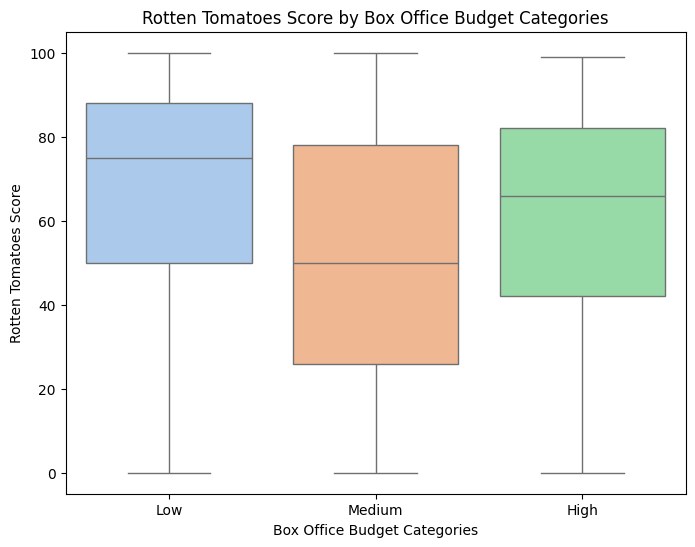


Hypothesis Test: Does the box office group affect the Rotten Tomatoes Score?
Null Hypothesis (H₀): The average Rotten Tomatoes Score is the same for all box office groups.
Alternative Hypothesis (H₁): At least one box office group has a different average Rotten Tomatoes Score.

ANOVA Result:
F-statistic = 109.9403
p-value = 0.0000000000

Conclusion: Since the p-value is less than 0.05, we reject the null hypothesis (H₀).
This means there is a statistically significant difference in average Rotten Tomatoes Score between at least some box office groups.

Average Rotten Tomatoes Score by Box Office Budget Categories:
Box Office Budget Categories
Low       67.621403
Medium    51.163816
High      60.909173
Name: Rotten Tomatoes Score, dtype: float64


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway

df = pd.read_csv("/content/netflix-rotten-tomatoes-metacritic-imdb.csv")

df['Boxoffice_clean'] = (
    df['Boxoffice']
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.replace(' ', '', regex=False)
    .replace('', 'nan')
    .astype(float)
)

df_scores = df[['Boxoffice_clean', 'IMDb Score', 'Metacritic Score', 'Rotten Tomatoes Score']].dropna()

df_scores['Box Office Budget Categories'] = pd.qcut(df_scores['Boxoffice_clean'], 3, labels=['Low', 'Medium', 'High'])

print("Number of films in each box office group:")
print(df_scores['Box Office Budget Categories'].value_counts())
print("\nBox office group boundaries:")
print(pd.qcut(df_scores['Boxoffice_clean'], 3).unique())

def boxoffice_anova_boxplot(score_col, score_name):
    print(f"\n\n=== {score_name} ANALYSIS BY BOX OFFICE GROUP ===")
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        x='Box Office Budget Categories',
        y=score_col,
        data=df_scores,
        hue='Box Office Budget Categories',
        palette='pastel',
        legend=False
    )
    plt.xlabel("Box Office Budget Categories")
    plt.ylabel(score_name)
    plt.title(f"{score_name} by Box Office Budget Categories")
    plt.show()


    scores_by_group = [group[score_col].values for name, group in df_scores.groupby('Box Office Budget Categories', observed=True)]
    f_stat, p_val = f_oneway(*scores_by_group)

    print(f"\nHypothesis Test: Does the box office group affect the {score_name}?")
    print(f"Null Hypothesis (H₀): The average {score_name} is the same for all box office groups.")
    print(f"Alternative Hypothesis (H₁): At least one box office group has a different average {score_name}.\n")
    print(f"ANOVA Result:\nF-statistic = {f_stat:.4f}\np-value = {p_val:.10f}")

    if p_val < 0.05:
        print(f"\nConclusion: Since the p-value is less than 0.05, we reject the null hypothesis (H₀).")
        print(f"This means there is a statistically significant difference in average {score_name} between at least some box office groups.\n")
    else:
        print(f"\nConclusion: Since the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis (H₀).")
        print(f"This means there is no statistically significant evidence that the average {score_name} differs across box office groups.\n")


    means = df_scores.groupby('Box Office Budget Categories', observed=True)[score_col].mean()
    print(f"Average {score_name} by Box Office Budget Categories:")
    print(means)

boxoffice_anova_boxplot('IMDb Score', 'IMDb Score')
boxoffice_anova_boxplot('Metacritic Score', 'Metacritic Score')
boxoffice_anova_boxplot('Rotten Tomatoes Score', 'Rotten Tomatoes Score')


# **Exploratory Data Analysis for the rating distribution and their effect on IMDB scores**

Step 1: Load and prepare the data
----------------------------------
Step 2: Analyze the distribution of content ratings
--------------------------------------------------
Step 3: Calculate average IMDb score for each rating
-----------------------------------------------------

The first plot (pie chart) shows how the dataset is distributed by content rating (such as PG, R, G, etc.).
The second plot (bar chart) shows the average IMDb score for each content rating, using a smooth color fade.

Interpretation:
---------------
• The pie chart shows which content ratings (like PG, R, G) are most common in the dataset.
• The bar chart shows if certain ratings (for example, G or PG-13) tend to have higher or lower average IMDb scores.
• If some bars are much higher or lower, it suggests that movie rating might influence audience reception or reflect production differences.
• The fade effect helps distinguish the categories while making the chart more visually appealing.


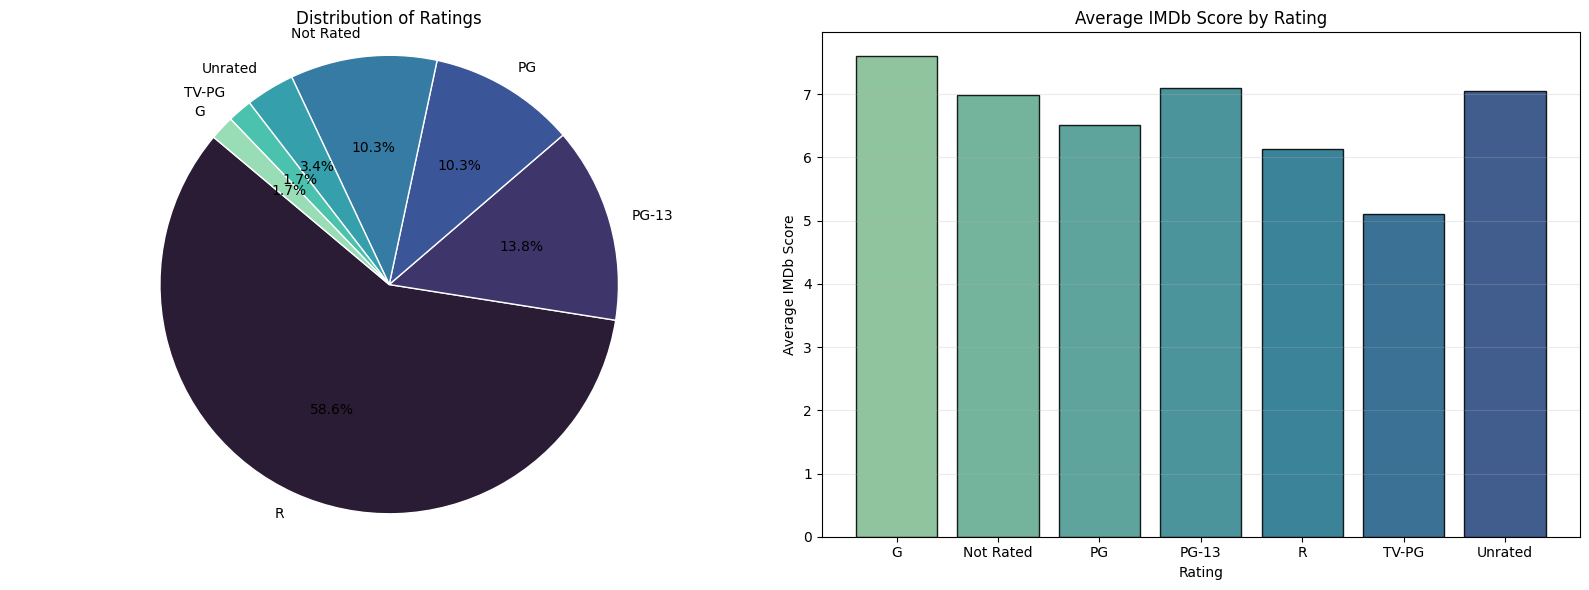

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Step 1: Load and prepare the data")
print("----------------------------------")
with open('/content/movies.csv', 'r', encoding='utf-8') as f:
    header = f.readline().strip().split(',')

df_fixed = pd.read_csv('/content/movies.csv', skiprows=1, names=header, on_bad_lines='skip')

print("Step 2: Analyze the distribution of content ratings")
print("--------------------------------------------------")
rating_counts = df_fixed['rating'].dropna().value_counts()

print("Step 3: Calculate average IMDb score for each rating")
print("-----------------------------------------------------")
rating_avg_scores = df_fixed[['rating', 'score']].dropna()
rating_avg_scores['score'] = pd.to_numeric(rating_avg_scores['score'], errors='coerce')
rating_avg_scores = rating_avg_scores.dropna()
avg_score_per_rating = rating_avg_scores.groupby('rating')['score'].mean()

print(
    "\nThe first plot (pie chart) shows how the dataset is distributed by content rating (such as PG, R, G, etc.).\n"
    "The second plot (bar chart) shows the average IMDb score for each content rating, using a smooth color fade."
)

print("\nInterpretation:")
print("---------------")
print(
    "• The pie chart shows which content ratings (like PG, R, G) are most common in the dataset.\n"
    "• The bar chart shows if certain ratings (for example, G or PG-13) tend to have higher or lower average IMDb scores.\n"
    "• If some bars are much higher or lower, it suggests that movie rating might influence audience reception or reflect production differences.\n"
    "• The fade effect helps distinguish the categories while making the chart more visually appealing."
)


fig, axes = plt.subplots(1, 2, figsize=(16, 6))

n_ratings = len(rating_counts)
fade_palette = sns.color_palette("mako", n_ratings)
axes[0].pie(
    rating_counts,
    labels=rating_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=fade_palette,
    wedgeprops=dict(edgecolor='white', linewidth=1)
)
axes[0].set_title('Distribution of Ratings')
axes[0].axis('equal')

fade_palette_bar = sns.color_palette("crest", len(avg_score_per_rating))
bars = axes[1].bar(
    avg_score_per_rating.index,
    avg_score_per_rating.values,
    color=fade_palette_bar,
    edgecolor='black',
    alpha=0.88
)
axes[1].set_title('Average IMDb Score by Rating')
axes[1].set_xlabel('Rating')
axes[1].set_ylabel('Average IMDb Score')
axes[1].grid(axis='y', alpha=0.25)

plt.tight_layout()
plt.show()

# **Exploratory Data Analysis for the effect of production year on IMDB and Rotten Tomatoes rating.**

========= IMDb SCORE ANALYSIS (movies.csv) =========

IMDb (movies.csv) ANOVA:
F-statistic = 4.900665 | p-value = 0.0044363876
Significant difference found between 5-year periods (Reject H₀).


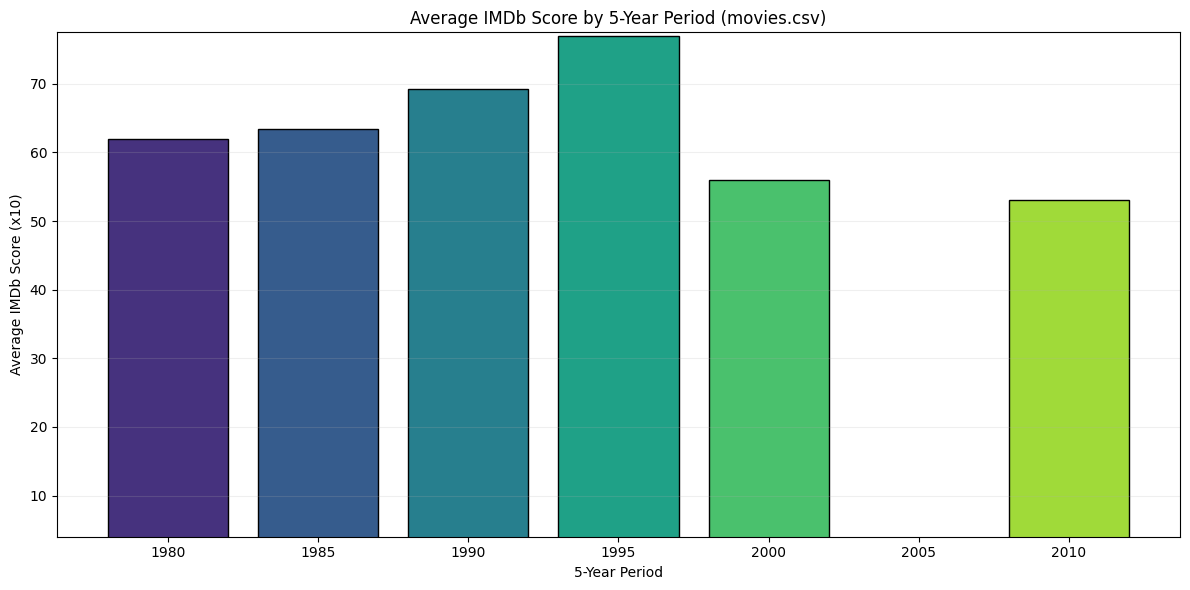


========= ROTTEN TOMATOES SCORE ANALYSIS (netflix-rotten-tomatoes-metacritic-imdb.csv) =========

Rotten Tomatoes (netflix dataset) ANOVA:
F-statistic = 14.002454 | p-value = 0.0000000000
Significant difference found between 5-year periods (Reject H₀).


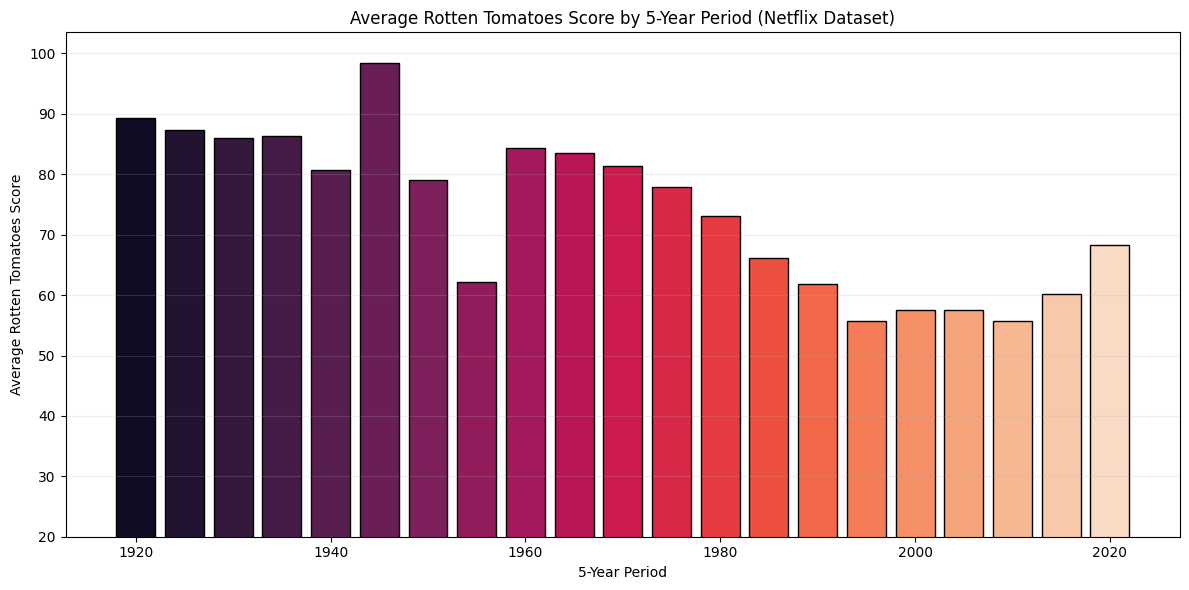

In [57]:
import pandas as pd
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("========= IMDb SCORE ANALYSIS (movies.csv) =========")
df = pd.read_csv("/content/movies.csv", on_bad_lines='skip')

df_year_score = df[['year', 'score']].dropna()
df_year_score['score'] = pd.to_numeric(df_year_score['score'], errors='coerce') * 10
df_year_score['period'] = (df_year_score['year'] // 5 * 5).astype(int)
avg_scores_per_period = df_year_score.groupby('period')['score'].mean().reset_index()
groups_5y = [group['score'].values for _, group in df_year_score.groupby('period') if len(group) >= 5]
anova_result_5y = f_oneway(*groups_5y)
f_stat_5y = anova_result_5y.statistic
p_val_5y = anova_result_5y.pvalue

print("\nIMDb (movies.csv) ANOVA:")
print(f"F-statistic = {f_stat_5y:.6f} | p-value = {p_val_5y:.10f}")
if p_val_5y < 0.05:
    print("Significant difference found between 5-year periods (Reject H₀).")
else:
    print("No significant difference between 5-year periods (Fail to reject H₀).")

plt.figure(figsize=(12, 6))
n_bars = avg_scores_per_period.shape[0]
colors = sns.color_palette('viridis', n_bars)
plt.bar(
    avg_scores_per_period['period'],
    avg_scores_per_period['score'],
    width=4,
    color=colors,
    edgecolor='black'
)
plt.xlabel('5-Year Period')
plt.ylabel('Average IMDb Score (x10)')
plt.title('Average IMDb Score by 5-Year Period (movies.csv)')
plt.ylim(4, avg_scores_per_period['score'].max() + 0.5)
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


print("\n========= ROTTEN TOMATOES SCORE ANALYSIS (netflix-rotten-tomatoes-metacritic-imdb.csv) =========")
df2 = pd.read_csv('/content/netflix-rotten-tomatoes-metacritic-imdb.csv')

if 'Release Date' in df2.columns:
    df2['year'] = pd.to_datetime(df2['Release Date'], errors='coerce').dt.year
elif 'Year' in df2.columns:
    df2['year'] = pd.to_numeric(df2['Year'], errors='coerce')
else:
    raise Exception("No release year found in Netflix dataset.")

df_rt = df2[['year', 'Rotten Tomatoes Score']].dropna()
df_rt['Rotten Tomatoes Score'] = pd.to_numeric(df_rt['Rotten Tomatoes Score'], errors='coerce')
df_rt = df_rt.dropna()
df_rt['period'] = (df_rt['year'] // 5 * 5).astype(int)
avg_rt_per_period = df_rt.groupby('period')['Rotten Tomatoes Score'].mean().reset_index()
groups_5y_rt = [group['Rotten Tomatoes Score'].values for _, group in df_rt.groupby('period') if len(group) >= 5]
if len(groups_5y_rt) >= 2:
    anova_result_5y_rt = f_oneway(*groups_5y_rt)
    f_stat_5y_rt = anova_result_5y_rt.statistic
    p_val_5y_rt = anova_result_5y_rt.pvalue
    print("\nRotten Tomatoes (netflix dataset) ANOVA:")
    print(f"F-statistic = {f_stat_5y_rt:.6f} | p-value = {p_val_5y_rt:.10f}")
    if p_val_5y_rt < 0.05:
        print("Significant difference found between 5-year periods (Reject H₀).")
    else:
        print("No significant difference between 5-year periods (Fail to reject H₀).")
else:
    print("Not enough periods/groups for ANOVA test in Rotten Tomatoes data.")

plt.figure(figsize=(12, 6))
n_bars_rt = avg_rt_per_period.shape[0]
colors_rt = sns.color_palette('rocket', n_bars_rt)
plt.bar(
    avg_rt_per_period['period'],
    avg_rt_per_period['Rotten Tomatoes Score'],
    width=4,
    color=colors_rt,
    edgecolor='black'
)
plt.xlabel('5-Year Period')
plt.ylabel('Average Rotten Tomatoes Score')
plt.title('Average Rotten Tomatoes Score by 5-Year Period (Netflix Dataset)')
plt.ylim(20, avg_rt_per_period['Rotten Tomatoes Score'].max() + 5)
plt.grid(axis='y', alpha=0.2)
plt.tight_layout()
plt.show()


# **Do Movies and Series Receive Different Ratings? (IMDb, Rotten Tomatoes, Metacritic Comparison)**


=== IMDB SCORE ANALYSIS ===
Sample size (movies): 100
Sample size (series): 100
ANOVA F-statistic: 24.9552
ANOVA p-value: 0.000001
Conclusion: p < 0.05; Statistically significant difference in IMDb Score between Movies and Series.


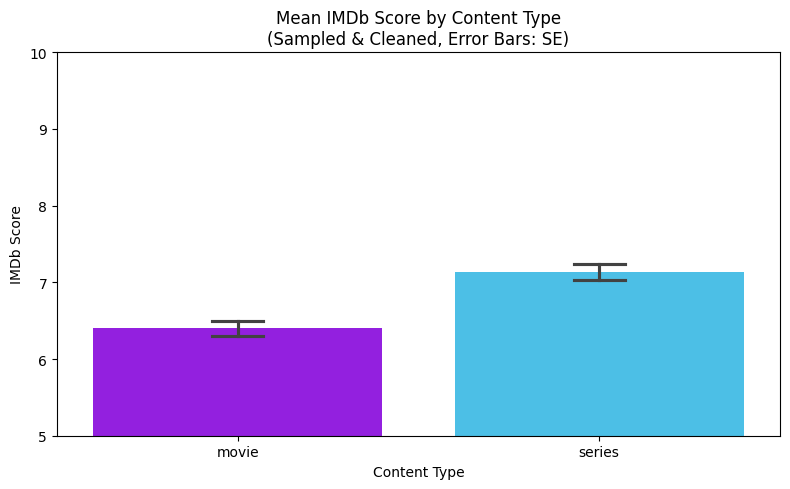


=== ROTTEN TOMATOES SCORE ANALYSIS ===
Sample size (movies): 100
Sample size (series): 100
ANOVA F-statistic: 0.4523
ANOVA p-value: 0.502048
Conclusion: p >= 0.05; No statistically significant difference in Rotten Tomatoes Score between Movies and Series.


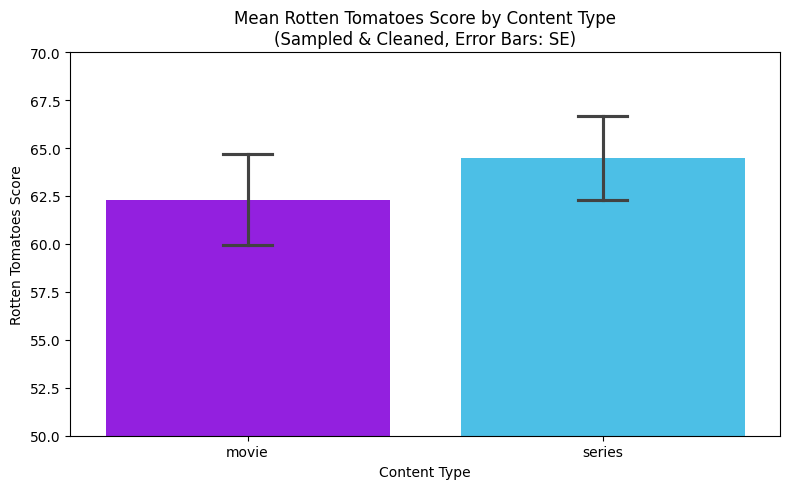


=== METACRITIC SCORE ANALYSIS ===
Sample size (movies): 100
Sample size (series): 86
ANOVA F-statistic: 0.0039
ANOVA p-value: 0.950063
Conclusion: p >= 0.05; No statistically significant difference in Metacritic Score between Movies and Series.


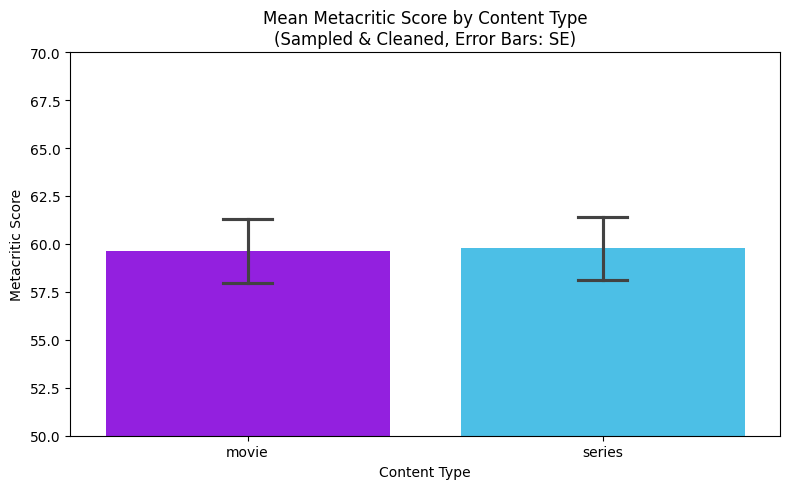

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Veri yükle
df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')
df.columns = df.columns.str.strip()   # <-- Kolon adlarındaki fazladan boşlukları temizler

def clean_and_sample(df, score_col, score_min, score_max, color_movie='#9900ff', color_series='#33ccff', score_name='Score'):
    dfc = df.copy()
    dfc[score_col] = pd.to_numeric(dfc[score_col], errors='coerce')
    dfc = dfc.dropna(subset=[score_col, 'Series or Movie'])
    dfc = dfc[dfc[score_col].between(score_min, score_max)]
    dfc['Series or Movie'] = dfc['Series or Movie'].str.strip().str.lower()
    dfc = dfc[dfc['Series or Movie'].isin(['movie', 'series'])]

    group_movie = dfc[dfc['Series or Movie'] == 'movie'][score_col]
    group_series = dfc[dfc['Series or Movie'] == 'series'][score_col]
    group_movie_sample = group_movie.sample(n=100, random_state=123) if len(group_movie) > 100 else group_movie
    group_series_sample = group_series.sample(n=100, random_state=456) if len(group_series) > 100 else group_series

    sample_df = pd.DataFrame({
        score_col: pd.concat([group_movie_sample, group_series_sample], ignore_index=True),
        'Series or Movie': (['movie'] * len(group_movie_sample)) + (['series'] * len(group_series_sample))
    })

    f_stat, p_val = f_oneway(group_movie_sample, group_series_sample)

    print(f"\n=== {score_name.upper()} ANALYSIS ===")
    print(f"Sample size (movies): {len(group_movie_sample)}")
    print(f"Sample size (series): {len(group_series_sample)}")
    print(f"ANOVA F-statistic: {f_stat:.4f}")
    print(f"ANOVA p-value: {p_val:.6f}")
    if p_val < 0.05:
        print(f"Conclusion: p < 0.05; Statistically significant difference in {score_name} between Movies and Series.")
    else:
        print(f"Conclusion: p >= 0.05; No statistically significant difference in {score_name} between Movies and Series.")

    bright_colors = {'movie': color_movie, 'series': color_series}
    plt.figure(figsize=(8, 5))
    sns.barplot(
        data=sample_df,
        x='Series or Movie',
        y=score_col,
        hue='Series or Movie',
        palette=bright_colors,
        errorbar='se',
        capsize=0.14,
        legend=False
    )
    plt.title(f'Mean {score_name} by Content Type\n(Sampled & Cleaned, Error Bars: SE)')
    plt.xlabel('Content Type')
    plt.ylabel(score_name)
    if score_name.lower().startswith('imdb'):
        plt.ylim(5, 10)
    elif score_name.lower().startswith('rotten') or score_name.lower().startswith('metacritic'):
        plt.ylim(50, 70)
    plt.tight_layout()
    plt.show()

# Fonksiyonu doğru kolon isimleriyle çağır!
clean_and_sample(df, 'IMDb Score', 4, 9, score_name='IMDb Score')
clean_and_sample(df, 'Rotten Tomatoes Score', 10, 100, score_name='Rotten Tomatoes Score')
clean_and_sample(df, 'Metacritic Score', 10, 100, score_name='Metacritic Score')


# **IMDb Score Prediction with Gradient Boosting and Feature Engineering**

In [60]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time

print("\n--- Optimized IMDb Score Prediction (Boost + Feature Engineering) ---\n")

df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')

if 'Release Date' in df.columns:
    df['Year'] = pd.to_datetime(df['Release Date'], errors='coerce').dt.year
else:
    df['Year'] = 0

features = ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer', 'IMDb Votes', 'Year']
target = 'IMDb Score'

df = df[features + [target]].dropna()
df['IMDb Votes'] = pd.to_numeric(df['IMDb Votes'], errors='coerce')
df = df[df['IMDb Votes'] > 10]
df = df[(df[target] >= 2) & (df[target] <= 9)]

df['Log_Votes'] = np.log1p(df['IMDb Votes'])

for col in ['Director', 'Writer']:
    top_cats = df[col].value_counts().nlargest(15).index
    df[col] = df[col].apply(lambda x: x if x in top_cats else 'Other')

df = df.head(5000)


categoricals = ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer']
numerics = ['Log_Votes', 'Year']
X_raw = df[categoricals + numerics]
y = df[target]


ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = ohe.fit_transform(X_raw[categoricals])
X_num = X_raw[numerics].values
X = np.hstack([X_cat, X_num])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training optimized Gradient Boosting Regressor...")
start = time.time()
model = GradientBoostingRegressor(
    n_estimators=120,
    learning_rate=0.07,
    max_depth=4,
    subsample=0.85,
    random_state=42
)
model.fit(X_train, y_train)
print("Model training complete. Elapsed time: {:.1f} seconds".format(time.time() - start))

y_pred = model.predict(X_test)

print("\nModel Results:\n")
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}")

if r2 < 0.5:
    print("\nNote: The R² value is below 0.5.  the chosen features may not fully capture IMDb scores.")
elif r2 < 0.7:
    print("\nNote: The R² value is moderate. The model captures some patterns, but further additional data may improve results.")
else:
    print("\nGreat! The R² value is relatively high, indicating strong predictive performance.")

print("\n--- End of Optimized Machine Learning Report ---")



--- Optimized IMDb Score Prediction (Boost + Feature Engineering) ---

Training optimized Gradient Boosting Regressor...
Model training complete. Elapsed time: 37.2 seconds

Model Results:

Mean Absolute Error (MAE): 0.712
Root Mean Squared Error (RMSE): 0.933
R² Score: 0.328

Note: The R² value is below 0.5.  the chosen features may not fully capture IMDb scores.

--- End of Optimized Machine Learning Report ---


# **Predicting IMDb Scores for New Films: Demonstration of Model Usage**

In [61]:
print("\n--- Custom Movie Examples: IMDb Score Prediction (Optimized Model) ---\n")

categoricals = ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer']
numerics = ['Log_Votes', 'Year']

film1 = {
    'Genre': 'Comedy',
    'Languages': 'English',
    'Series or Movie': 'Movie',
    'Runtime': '1-2 hour',
    'Director': 'Coky Giedroyc',
    'Writer': 'Caitlin Moran',
    'IMDb Votes': 3000,
    'Year': 2019
}
film1['Log_Votes'] = np.log1p(film1['IMDb Votes'])
print("EXAMPLE 1: Predicting IMDb Score for the following movie:")
for key, value in film1.items():
    print(f"  - {key}: {value}")

for col in ['Director', 'Writer']:
    if film1[col] not in df[col].value_counts().nlargest(15).index:
        film1[col] = 'Other'

film1_df = pd.DataFrame([film1])
for col in categoricals:
    if col not in film1_df.columns:
        film1_df[col] = 'Unknown'
film1_df = film1_df[categoricals + ['Log_Votes', 'Year']]

film1_cat = ohe.transform(film1_df[categoricals])
film1_num = film1_df[['Log_Votes', 'Year']].values
film1_X = np.hstack([film1_cat, film1_num])

film1_pred = model.predict(film1_X)
print(f"\nPredicted IMDb Score: {film1_pred[0]:.2f}\n")
print("Explanation: This prediction uses all features including log-scaled votes and release year.\n")

film2 = {
    'Genre': 'Drama',
    'Languages': 'French',
    'Series or Movie': 'Movie',
    'Runtime': '1-2 hour',
    'Director': 'Unknown',
    'Writer': 'Unknown',
    'IMDb Votes': 80,
    'Year': 2022
}
film2['Log_Votes'] = np.log1p(film2['IMDb Votes'])
print("EXAMPLE 2: Predicting IMDb Score for another movie:")
for key, value in film2.items():
    print(f"  - {key}: {value}")

for col in ['Director', 'Writer']:
    if film2[col] not in df[col].value_counts().nlargest(15).index:
        film2[col] = 'Other'

film2_df = pd.DataFrame([film2])
for col in categoricals:
    if col not in film2_df.columns:
        film2_df[col] = 'Unknown'
film2_df = film2_df[categoricals + ['Log_Votes', 'Year']]

film2_cat = ohe.transform(film2_df[categoricals])
film2_num = film2_df[['Log_Votes', 'Year']].values
film2_X = np.hstack([film2_cat, film2_num])

film2_pred = model.predict(film2_X)
print(f"\nPredicted IMDb Score: {film2_pred[0]:.2f}\n")
print("Explanation: Again, the model uses metadata, log-votes, and release year for prediction.\n")

print("--- End of IMDb Score Example Predictions ---")



--- Custom Movie Examples: IMDb Score Prediction (Optimized Model) ---

EXAMPLE 1: Predicting IMDb Score for the following movie:
  - Genre: Comedy
  - Languages: English
  - Series or Movie: Movie
  - Runtime: 1-2 hour
  - Director: Coky Giedroyc
  - Writer: Caitlin Moran
  - IMDb Votes: 3000
  - Year: 2019
  - Log_Votes: 8.006700845440367

Predicted IMDb Score: 5.91

Explanation: This prediction uses all features including log-scaled votes and release year.

EXAMPLE 2: Predicting IMDb Score for another movie:
  - Genre: Drama
  - Languages: French
  - Series or Movie: Movie
  - Runtime: 1-2 hour
  - Director: Unknown
  - Writer: Unknown
  - IMDb Votes: 80
  - Year: 2022
  - Log_Votes: 4.394449154672439

Predicted IMDb Score: 6.00

Explanation: Again, the model uses metadata, log-votes, and release year for prediction.

--- End of IMDb Score Example Predictions ---


# **Rotten Tomatoes Score Prediction Using Gradient Boosting and IMDb Feature**

In [62]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n--- Rotten Tomatoes Score: Gradient Boosting Regression + IMDb Feature ---\n")

print("Step 1: Loading dataset...")
df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')
print("Dataset loaded.\n")

print("Step 2: Feature selection, including IMDb Score, and removing low-vote films...")
features = ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer', 'IMDb Votes', 'IMDb Score']
target = 'Rotten Tomatoes Score'
df = df[features + [target]].dropna()
df['IMDb Votes'] = pd.to_numeric(df['IMDb Votes'], errors='coerce').fillna(0)
df = df[df['IMDb Votes'] >= 10]
for col in ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer']:
    df[col] = df[col].fillna('Unknown')
X_raw = df[features]
y = df[target]
print(f"Data shape after cleaning: {df.shape[0]} rows.\n")

print("Step 3: Encoding categorical features...")
categoricals = ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, max_categories=30)
X_cat = ohe.fit_transform(X_raw[categoricals])
X_num = X_raw[['IMDb Votes', 'IMDb Score']].values
X = np.hstack([X_cat, X_num])
print("Features encoded.\n")

print("Step 4: Splitting data...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Split complete.\n")

print("Step 5: Training Gradient Boosting Regressor...")
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.08, random_state=42)
gbr.fit(X_train, y_train)
print("Model trained.\n")

print("Step 6: Predicting test set...")
y_pred = gbr.predict(X_test)
print("Prediction complete.\n")

print("Step 7: Evaluating model...\n")
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print("  -> On average, the predictions are off by {:.2f} Rotten Tomatoes score points.".format(mae))
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
print(f"R² Score: {r2:.3f}\n")

if r2 < 0.5:
    print("Note: The R² value is still below 0.5, which means there is a weak relationship between features and Rotten Tomatoes scores. This may be due to noisy data or missing key information.")
elif r2 < 0.7:
    print("Note: The R² value is moderate. The model is capturing some trends.")
else:
    print("Great! The R² value is relatively high. Your feature engineering improved predictive power!")

print("\n--- End of Gradient Boosting Report ---")



--- Rotten Tomatoes Score: Gradient Boosting Regression + IMDb Feature ---

Step 1: Loading dataset...
Dataset loaded.

Step 2: Feature selection, including IMDb Score, and removing low-vote films...
Data shape after cleaning: 6181 rows.

Step 3: Encoding categorical features...
Features encoded.

Step 4: Splitting data...
Split complete.

Step 5: Training Gradient Boosting Regressor...
Model trained.

Step 6: Predicting test set...
Prediction complete.

Step 7: Evaluating model...

Mean Absolute Error (MAE): 13.185
  -> On average, the predictions are off by 13.19 Rotten Tomatoes score points.
Root Mean Squared Error (RMSE): 16.954
R² Score: 0.595

Note: The R² value is moderate. The model is capturing some trends.

--- End of Gradient Boosting Report ---


# **Demonstrating Rotten Tomatoes Score Predictions for New Movies (Gradient Boosting Model)**

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n--- Rotten Tomatoes Score: Gradient Boosting Regression + IMDb Feature ---\n")

print("Step 1: Loading and cleaning dataset...")
df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')

features = ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer', 'IMDb Votes', 'IMDb Score']
target = 'Rotten Tomatoes Score'
df = df[features + [target]].dropna()
df['IMDb Votes'] = pd.to_numeric(df['IMDb Votes'], errors='coerce').fillna(0)
df = df[df['IMDb Votes'] >= 10]
for col in ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer']:
    df[col] = df[col].fillna('Unknown')
X_raw = df[features]
y = df[target]

categoricals = ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, max_categories=30)
X_cat = ohe.fit_transform(X_raw[categoricals])
X_num = X_raw[['IMDb Votes', 'IMDb Score']].values
X = np.hstack([X_cat, X_num])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.08, random_state=42)
gbr.fit(X_train, y_train)

y_pred = gbr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Model test results:\n  MAE: {mae:.3f}\n  RMSE: {rmse:.3f}\n  R²: {r2:.3f}\n")
print("Now testing the model with two custom movie examples:\n")

film1 = {
    'Genre': 'Comedy',
    'Languages': 'English',
    'Series or Movie': 'Movie',
    'Runtime': '1-2 hour',
    'Director': 'Coky Giedroyc',
    'Writer': 'Caitlin Moran',
    'IMDb Votes': 3000,
    'IMDb Score': 5.8
}
print("EXAMPLE 1: A new movie with the following features:")
for key, value in film1.items():
    print(f"  - {key}: {value}")

film1_df = pd.DataFrame([film1])
for col in categoricals:
    if col not in film1_df.columns:
        film1_df[col] = 'Unknown'
film1_df = film1_df[categoricals + ['IMDb Votes', 'IMDb Score']]

film1_cat = ohe.transform(film1_df[categoricals])
film1_num = film1_df[['IMDb Votes', 'IMDb Score']].values
film1_X = np.hstack([film1_cat, film1_num])

film1_pred = gbr.predict(film1_X)
print(f"Predicted Rotten Tomatoes Score: {film1_pred[0]:.2f}\n")
print("Explanation: This predicted score is based only on the features above. If any feature is not in the training data, it is treated as 'unknown'.\n")

film2 = {
    'Genre': 'Drama',
    'Languages': 'French',
    'Series or Movie': 'Movie',
    'Runtime': '1-2 hour',
    'Director': 'Unknown',
    'Writer': 'Unknown',
    'IMDb Votes': 50,
    'IMDb Score': 7.9
}
print("EXAMPLE 2: A new movie with the following features:")
for key, value in film2.items():
    print(f"  - {key}: {value}")

film2_df = pd.DataFrame([film2])
for col in categoricals:
    if col not in film2_df.columns:
        film2_df[col] = 'Unknown'
film2_df = film2_df[categoricals + ['IMDb Votes', 'IMDb Score']]

film2_cat = ohe.transform(film2_df[categoricals])
film2_num = film2_df[['IMDb Votes', 'IMDb Score']].values
film2_X = np.hstack([film2_cat, film2_num])

film2_pred = gbr.predict(film2_X)
print(f"Predicted Rotten Tomatoes Score: {film2_pred[0]:.2f}\n")




--- Rotten Tomatoes Score: Gradient Boosting Regression + IMDb Feature ---

Step 1: Loading and cleaning dataset...
Model test results:
  MAE: 13.185
  RMSE: 16.954
  R²: 0.595

Now testing the model with two custom movie examples:

EXAMPLE 1: A new movie with the following features:
  - Genre: Comedy
  - Languages: English
  - Series or Movie: Movie
  - Runtime: 1-2 hour
  - Director: Coky Giedroyc
  - Writer: Caitlin Moran
  - IMDb Votes: 3000
  - IMDb Score: 5.8
Predicted Rotten Tomatoes Score: 50.61

Explanation: This predicted score is based only on the features above. If any feature is not in the training data, it is treated as 'unknown'.

EXAMPLE 2: A new movie with the following features:
  - Genre: Drama
  - Languages: French
  - Series or Movie: Movie
  - Runtime: 1-2 hour
  - Director: Unknown
  - Writer: Unknown
  - IMDb Votes: 50
  - IMDb Score: 7.9
Predicted Rotten Tomatoes Score: 95.56



# **Metacritic Score Prediction: Machine Learning Pipeline Using IMDb, and Rotten Tomatoes Scores**

In [64]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n--- Metacritic Score Prediction: Machine Learning Pipeline ---\n")

print("Step 1: Loading the dataset and preparing features...")
df = pd.read_csv('netflix-rotten-tomatoes-metacritic-imdb.csv')

features = ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer',
            'IMDb Votes', 'IMDb Score', 'Rotten Tomatoes Score']
target = 'Metacritic Score'

print("Step 2: Removing all rows with missing values in features or target...")
df = df[features + [target]].dropna()
df['IMDb Votes'] = pd.to_numeric(df['IMDb Votes'], errors='coerce').fillna(0)
df = df[df['IMDb Votes'] >= 10]
for col in ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer']:
    df[col] = df[col].fillna('Unknown')
print(f"Remaining rows after cleaning: {df.shape[0]}")

X_raw = df[features]
y = df[target]

print("\nStep 3: Encoding categorical variables using One-Hot Encoding (top 30 categories kept for each)...")
categoricals = ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer']
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, max_categories=30)
X_cat = ohe.fit_transform(X_raw[categoricals])
X_num = X_raw[['IMDb Votes', 'IMDb Score', 'Rotten Tomatoes Score']].values
X = np.hstack([X_cat, X_num])
print("Encoding complete.")

print("\nStep 4: Splitting data into training (80%) and test (20%) sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape[0]}  |  Test set size: {X_test.shape[0]}")

print("\nStep 5: Training Gradient Boosting Regressor on the training set...")
gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.08, random_state=42)
gbr.fit(X_train, y_train)
print("Model training complete.")

print("\nStep 6: Predicting Metacritic Scores for the test set...")
y_pred = gbr.predict(X_test)
print("Prediction complete.")

print("\nStep 7: Evaluating model performance:")
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"  - Mean Absolute Error (MAE): {mae:.3f}")
print("    > On average, the predicted Metacritic Score is off by this amount.")
print(f"  - Root Mean Squared Error (RMSE): {rmse:.3f}")
print("    > Penalizes larger errors more; lower is better.")
print(f"  - R² Score: {r2:.3f}")
print("    > Shows how much of the variation in Metacritic Scores is explained by the model (1=perfect, 0=none).")

if r2 < 0.5:
    print("Note: The R² value is below 0.5, which means the features used explain less than half of the Metacritic Score variability. The model may not capture complex patterns or may lack informative features.")
elif r2 < 0.7:
    print("Note: The R² value is moderate. The model captures some of the variation in the scores, but could likely be improved with more or better features.")
else:
    print("Great! The R² value is relatively high, indicating strong predictive performance for this task.")

print("\n--- End of Machine Learning Report ---")



--- Metacritic Score Prediction: Machine Learning Pipeline ---

Step 1: Loading the dataset and preparing features...
Step 2: Removing all rows with missing values in features or target...
Remaining rows after cleaning: 3853

Step 3: Encoding categorical variables using One-Hot Encoding (top 30 categories kept for each)...
Encoding complete.

Step 4: Splitting data into training (80%) and test (20%) sets...
Training set size: 3082  |  Test set size: 771

Step 5: Training Gradient Boosting Regressor on the training set...
Model training complete.

Step 6: Predicting Metacritic Scores for the test set...
Prediction complete.

Step 7: Evaluating model performance:
  - Mean Absolute Error (MAE): 5.212
    > On average, the predicted Metacritic Score is off by this amount.
  - Root Mean Squared Error (RMSE): 6.772
    > Penalizes larger errors more; lower is better.
  - R² Score: 0.848
    > Shows how much of the variation in Metacritic Scores is explained by the model (1=perfect, 0=none).

# **Metacritic Score Prediction for Custom Movies: Example Demonstrations**

In [65]:
print("\n--- Custom Movie Examples: Metacritic Score Prediction ---\n")

categoricals = ['Genre', 'Languages', 'Series or Movie', 'Runtime', 'Director', 'Writer']

film1 = {
    'Genre': 'Comedy',
    'Languages': 'English',
    'Series or Movie': 'Movie',
    'Runtime': '1-2 hour',
    'Director': 'Coky Giedroyc',
    'Writer': 'Caitlin Moran',
    'IMDb Votes': 3000,
    'IMDb Score': 5.8,
    'Rotten Tomatoes Score': 68.0
}
print("EXAMPLE 1: Predicting Metacritic Score for the following movie:")
for key, value in film1.items():
    print(f"  - {key}: {value}")

film1_df = pd.DataFrame([film1])
for col in categoricals:
    if col not in film1_df.columns:
        film1_df[col] = 'Unknown'
film1_df = film1_df[categoricals + ['IMDb Votes', 'IMDb Score', 'Rotten Tomatoes Score']]

film1_cat = ohe.transform(film1_df[categoricals])
film1_num = film1_df[['IMDb Votes', 'IMDb Score', 'Rotten Tomatoes Score']].values
film1_X = np.hstack([film1_cat, film1_num])

film1_pred = gbr.predict(film1_X)
print(f"\nPredicted Metacritic Score: {film1_pred[0]:.2f}\n")
print("Explanation: This prediction uses all the features above, including both IMDb and Rotten Tomatoes scores.\n")

film2 = {
    'Genre': 'Drama',
    'Languages': 'French',
    'Series or Movie': 'Movie',
    'Runtime': '1-2 hour',
    'Director': 'Unknown',
    'Writer': 'Unknown',
    'IMDb Votes': 80,
    'IMDb Score': 7.5,
    'Rotten Tomatoes Score': 82.0
}
print("EXAMPLE 2: Predicting Metacritic Score for another movie:")
for key, value in film2.items():
    print(f"  - {key}: {value}")

film2_df = pd.DataFrame([film2])
for col in categoricals:
    if col not in film2_df.columns:
        film2_df[col] = 'Unknown'
film2_df = film2_df[categoricals + ['IMDb Votes', 'IMDb Score', 'Rotten Tomatoes Score']]
film2_cat = ohe.transform(film2_df[categoricals])
film2_num = film2_df[['IMDb Votes', 'IMDb Score', 'Rotten Tomatoes Score']].values
film2_X = np.hstack([film2_cat, film2_num])

film2_pred = gbr.predict(film2_X)
print(f"\nPredicted Metacritic Score: {film2_pred[0]:.2f}\n")
print("Explanation: Again, the model uses all metadata and scores for prediction. The more accurate your input, the better the prediction!\n")

print("--- End of Metacritic Score Examples ---")



--- Custom Movie Examples: Metacritic Score Prediction ---

EXAMPLE 1: Predicting Metacritic Score for the following movie:
  - Genre: Comedy
  - Languages: English
  - Series or Movie: Movie
  - Runtime: 1-2 hour
  - Director: Coky Giedroyc
  - Writer: Caitlin Moran
  - IMDb Votes: 3000
  - IMDb Score: 5.8
  - Rotten Tomatoes Score: 68.0

Predicted Metacritic Score: 55.94

Explanation: This prediction uses all the features above, including both IMDb and Rotten Tomatoes scores.

EXAMPLE 2: Predicting Metacritic Score for another movie:
  - Genre: Drama
  - Languages: French
  - Series or Movie: Movie
  - Runtime: 1-2 hour
  - Director: Unknown
  - Writer: Unknown
  - IMDb Votes: 80
  - IMDb Score: 7.5
  - Rotten Tomatoes Score: 82.0

Predicted Metacritic Score: 74.36

Explanation: Again, the model uses all metadata and scores for prediction. The more accurate your input, the better the prediction!

--- End of Metacritic Score Examples ---
